In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [50]:
X = pd.read_csv('10_Mall_Customers.csv')

In [51]:
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
X['Genre'].replace('Male', 0, inplace=True)
X['Genre'].replace('Female', 1, inplace=True)

Поменяли строки на числа 

C:\Users\nudan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

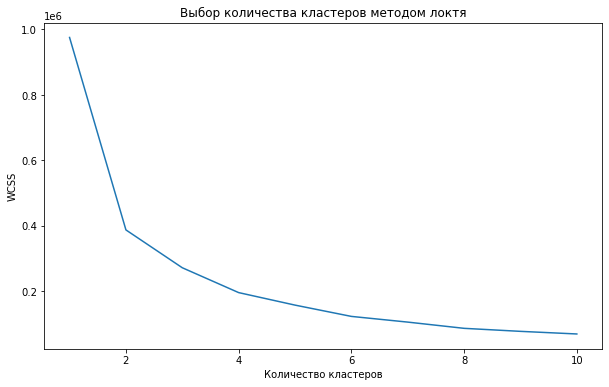

In [21]:
# импортируем нужный класс
from sklearn.cluster import KMeans
 
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
 
# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):
    
    # настроим параметры модели (подробнее об этом расскажу чуть дальше)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)
 
# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [ ]:
метод лоактя: кластеры 4

In [25]:
scores = []
values = np.arange(2, 10)

In [26]:
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.4793049017423563

Number of clusters = 3
Silhouette score = 0.3766801400675223

Number of clusters = 4
Silhouette score = 0.42245261332521883

Number of clusters = 5
Silhouette score = 0.4129419301414886

Number of clusters = 6
Silhouette score = 0.409528091044574

Number of clusters = 7
Silhouette score = 0.400099295975502

Number of clusters = 8
Silhouette score = 0.40550215828085

Number of clusters = 9
Silhouette score = 0.40036251957599445



Optimal number of clusters = 2


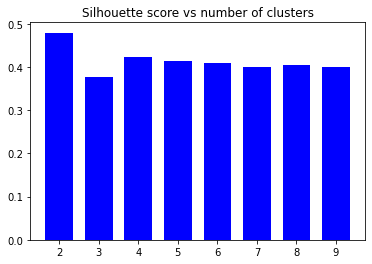

In [38]:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

2 класетера или 4 

In [34]:
# заново обучим модель с тремя кластерами
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)


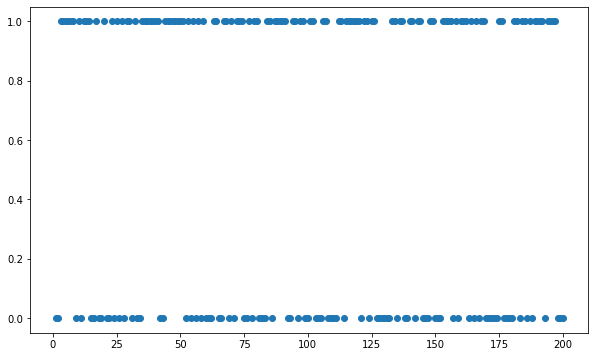

In [35]:
# зададим размер
plt.figure(figsize = (10,6))
 
# возьмем первый и второй столбцы с помощью функции iloc()
# параметр с задаст каждой точке определенный код (0, 1, 2), а
# camp определит цвет каждой из точек
plt.scatter(X.iloc[:,0], X.iloc[:,1],  cmap = 'Paired')

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [45]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [46]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=30.88802908776477, bin_seeding=True)

In [47]:
# Извлечь центры кластеров
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)


Centers of clusters:
 [[ 99.85106383   0.59574468  40.65957447  60.53191489  49.44680851]
 [ 67.13333333   0.55555556  45.77777778  48.28888889  50.48888889]
 [150.           0.55555556  33.          77.66666667  82.37037037]
 [153.           0.43478261  38.39130435  78.95652174  16.69565217]
 [ 24.           0.60869565  25.52173913  26.30434783  78.56521739]
 [ 26.           0.6         48.5         27.85        19.8       ]
 [180.           0.5         44.125       95.9375      19.5       ]]


In [48]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)


Number of clusters in input data = 7


In [69]:
X_trean = pd.DataFrame(X["Age"])
X_trean["Spending Score (1-100)"] = pd.DataFrame(X["Spending Score (1-100)"])

In [92]:
X_trean

,Age,Spending Score (1-100),Target
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


In [93]:
x1 = X_trean.to_numpy()

In [94]:
x1

array([[19, 39,  3],
       [21, 81,  2],
       [20,  6,  1],
       [23, 77,  2],
       [31, 40,  3],
       [22, 76,  2],
       [35,  6,  1],
       [23, 94,  2],
       [64,  3,  1],
       [30, 72,  2],
       [67, 14,  1],
       [35, 99,  2],
       [58, 15,  1],
       [24, 77,  2],
       [37, 13,  1],
       [22, 79,  2],
       [35, 35,  3],
       [20, 66,  3],
       [52, 29,  1],
       [35, 98,  2],
       [35, 35,  3],
       [25, 73,  2],
       [46,  5,  1],
       [31, 73,  2],
       [54, 14,  1],
       [29, 82,  2],
       [45, 32,  1],
       [35, 61,  3],
       [40, 31,  1],
       [23, 87,  2],
       [60,  4,  1],
       [21, 73,  2],
       [53,  4,  1],
       [18, 92,  2],
       [49, 14,  1],
       [21, 81,  2],
       [42, 17,  1],
       [30, 73,  2],
       [36, 26,  1],
       [20, 75,  2],
       [65, 35,  0],
       [24, 92,  2],
       [48, 36,  0],
       [31, 61,  3],
       [49, 28,  1],
       [24, 65,  3],
       [50, 55,  0],
       [27, 4

([], [])

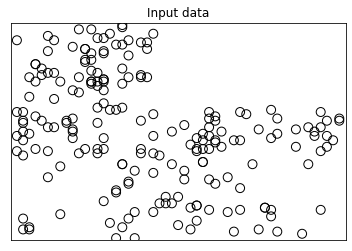

In [95]:
plt.figure()
plt.scatter(x1[:,0], x1[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [96]:
scores = []
values = np.arange(2, 10)

In [97]:
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(x1)
    score = metrics.silhouette_score(x1, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.4691265279380666

Number of clusters = 3
Silhouette score = 0.45224748456174896

Number of clusters = 4
Silhouette score = 0.5014655901371472

Number of clusters = 5
Silhouette score = 0.43453434314072814

Number of clusters = 6
Silhouette score = 0.44206348015683067

Number of clusters = 7
Silhouette score = 0.4221940708806092

Number of clusters = 8
Silhouette score = 0.43014207113394165

Number of clusters = 9
Silhouette score = 0.41400446674878194



Optimal number of clusters = 4


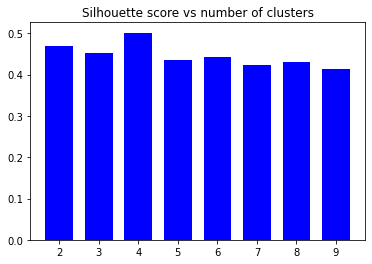

In [98]:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

4 кластера 

In [99]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

In [100]:
y_pred = kmeans.fit_predict(x1)

In [101]:
X_trean["Target"] = y_pred

In [102]:
X_trean

,Age,Spending Score (1-100),Target
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


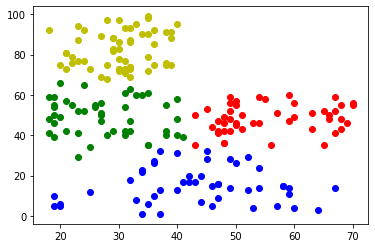

In [103]:
plt.scatter(X_trean[X_trean["Target"]==0]["Age"], X_trean[X_trean["Target"]==0]["Spending Score (1-100)"], c = "r");
plt.scatter(X_trean[X_trean["Target"]==1]["Age"], X_trean[X_trean["Target"]==1]["Spending Score (1-100)"], c = "b");
plt.scatter(X_trean[X_trean["Target"]==2]["Age"], X_trean[X_trean["Target"]==2]["Spending Score (1-100)"], c = "y");
plt.scatter(X_trean[X_trean["Target"]==3]["Age"], X_trean[X_trean["Target"]==3]["Spending Score (1-100)"], c = "g");



In [ ]:
Синии молодые всяобразные - уникумы
Зеленый среднего возроста малый зароботок - средний класс
Красные среднего возроста большой заработок - багачи
Желтые пожеленые малый заработок - пенсионры 